## 0. Install and Import Dependencies

In [ ]:
# Install pytorch
#https://pytorch.org/get-started/locally/
# Install easyocr 
!pip install easyocr

In [ ]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

In [ ]:
IMAGE_PATH = 'img004.jpg'
#IMAGE_PATH = 'surf.jpeg'

<function matplotlib.pyplot.show>

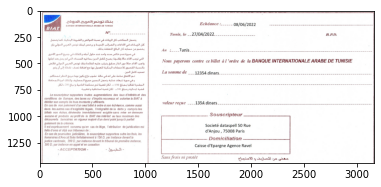

In [ ]:
img = cv2.imread(IMAGE_PATH)
plt.imshow(img)
plt.show

In [ ]:
im = Image.open('img004.jpg')
cropped = im.crop((1000,1,3000,1400))

In [ ]:
cropped_image = img[0:1360, 1000:3000]

<function matplotlib.pyplot.show>

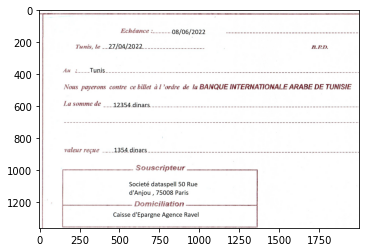

In [ ]:
plt.imshow(cropped_image)
plt.show

In [ ]:
cv2.imwrite("Crop.jpg", cropped_image)

True

In [ ]:
cropped.save('crop3.jpg')

In [ ]:
IMAGE_PATH = 'crop3.jpg'

In [ ]:
reader = easyocr.Reader(['fr'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[508, 109], [695, 109], [695, 151], [508, 151]],
  'Echéance',
  0.9979174019148019),
 ([[823, 108], [1046, 108], [1046, 163], [823, 163]],
  '08/06/2022',
  0.999934066181277),
 ([[224, 207], [389, 207], [389, 251], [224, 251]],
  'Tunis, le',
  0.9052608648320445),
 ([[429, 205], [651, 205], [651, 249], [429, 249]],
  '27/04/2022',
  0.9999364515295035),
 ([[1702, 216], [1808, 216], [1808, 248], [1702, 248]],
  'B.PD',
  0.7374415605863034),
 ([[148, 362], [202, 362], [202, 394], [148, 394]], 'Au', 0.619337129994434),
 ([[313, 355], [417, 355], [417, 397], [313, 397]],
  'Tunis',
  0.9245621092137192),
 ([[152, 456], [427, 456], [427, 512], [152, 512]],
  'Nous   puyerons',
  0.8536596148583714),
 ([[435, 465], [555, 465], [555, 501], [435, 501]],
  'contre',
  0.981648880283298),
 ([[564, 454], [1960, 454], [1960, 504], [564, 504]],
  "ce billet à1 'ordre de la BANQUE INTERNATIONALE ARABE DE TUNISIE",
  0.49761963055013975),
 ([[149, 561], [393, 561], [393, 605], [149, 605]],
  '

In [ ]:
for i in range(0,len(result)):
  res=result[i][1]
  print(res)

Echéance
08/06/2022
Tunis, le
27/04/2022
B.PD
Au
Tunis
Nous   puyerons
contre
ce billet à1 'ordre de la BANQUE INTERNATIONALE ARABE DE TUNISIE
La somme de
12354 dinars
valeur reçue
1354 dinars
Souscripteur
Societé dataspell 50 Rue
d'Anjou
75008 Paris
Domiciliation
Caisse d'Epargne Agence Ravel


In [ ]:
import xml.etree.ElementTree as ET


data = ET.Element('Echeance')
element0 = ET.SubElement(data, 'DateEcheance')
s_elem1 = ET.SubElement(element0, 'date')
s_elem1.text = result[1][1]

element1 = ET.SubElement(data, 'DateLieuSign')
s_elem1 = ET.SubElement(element1, 'date')
s_elem2 = ET.SubElement(element1, 'lieu')
s_elem1.text = result[3][1]
s_elem2.text = result[6][1]


element2 = ET.SubElement(data, 'Client')
s_elem1 = ET.SubElement(element2, 'souscripteur')
s_elem2 = ET.SubElement(element2, 'domiciliation')
s_elem1.text = result[15][1]+result[15][1]+result[16][1]
s_elem2.text = result[19][1]

element2 = ET.SubElement(data, 'Somme')
s_elem1 = ET.SubElement(element2, 'somme')
s_elem2 = ET.SubElement(element2, 'valeurRecu')
s_elem1.text = result[11][1]
s_elem2.text = result[13][1]




b_xml = ET.tostring(data)

with open("Echeance_data.xml", "wb") as f:
	f.write(b_xml)
